In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [3]:
# We start by defining the path to the file that we're we need to load.
# Upon inspection, we saw that the messy_data.data was infact a file in the
# format of a CSV-file with a ".data" extention instead.
df = pd.read_csv('./data/data.csv')


In [4]:
df.famhist = df.famhist.map({'Present':1,
               'Absent':0})

In [5]:
df = df.drop(columns='row.names')

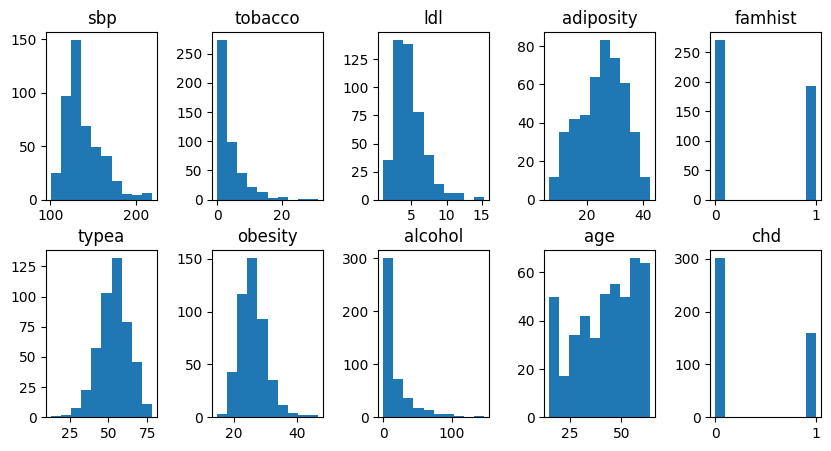

In [6]:
hist = df.hist(layout=(2, int(len(df.columns)/2)), figsize=(10, 5), grid=False)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

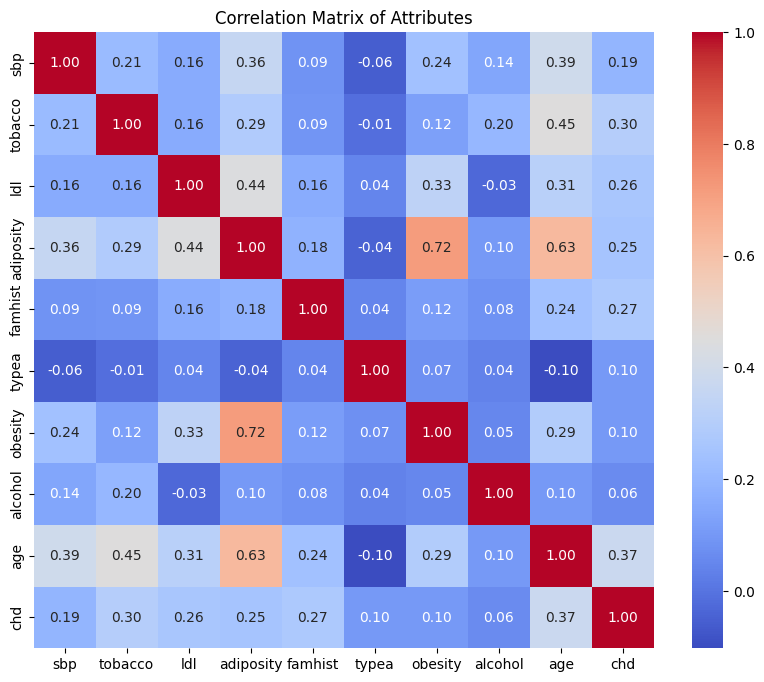

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Attributes')
plt.show()


In [8]:
import seaborn as sns

/tmp/ipykernel_14486/50443752.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k',color='red', linewidth=2)


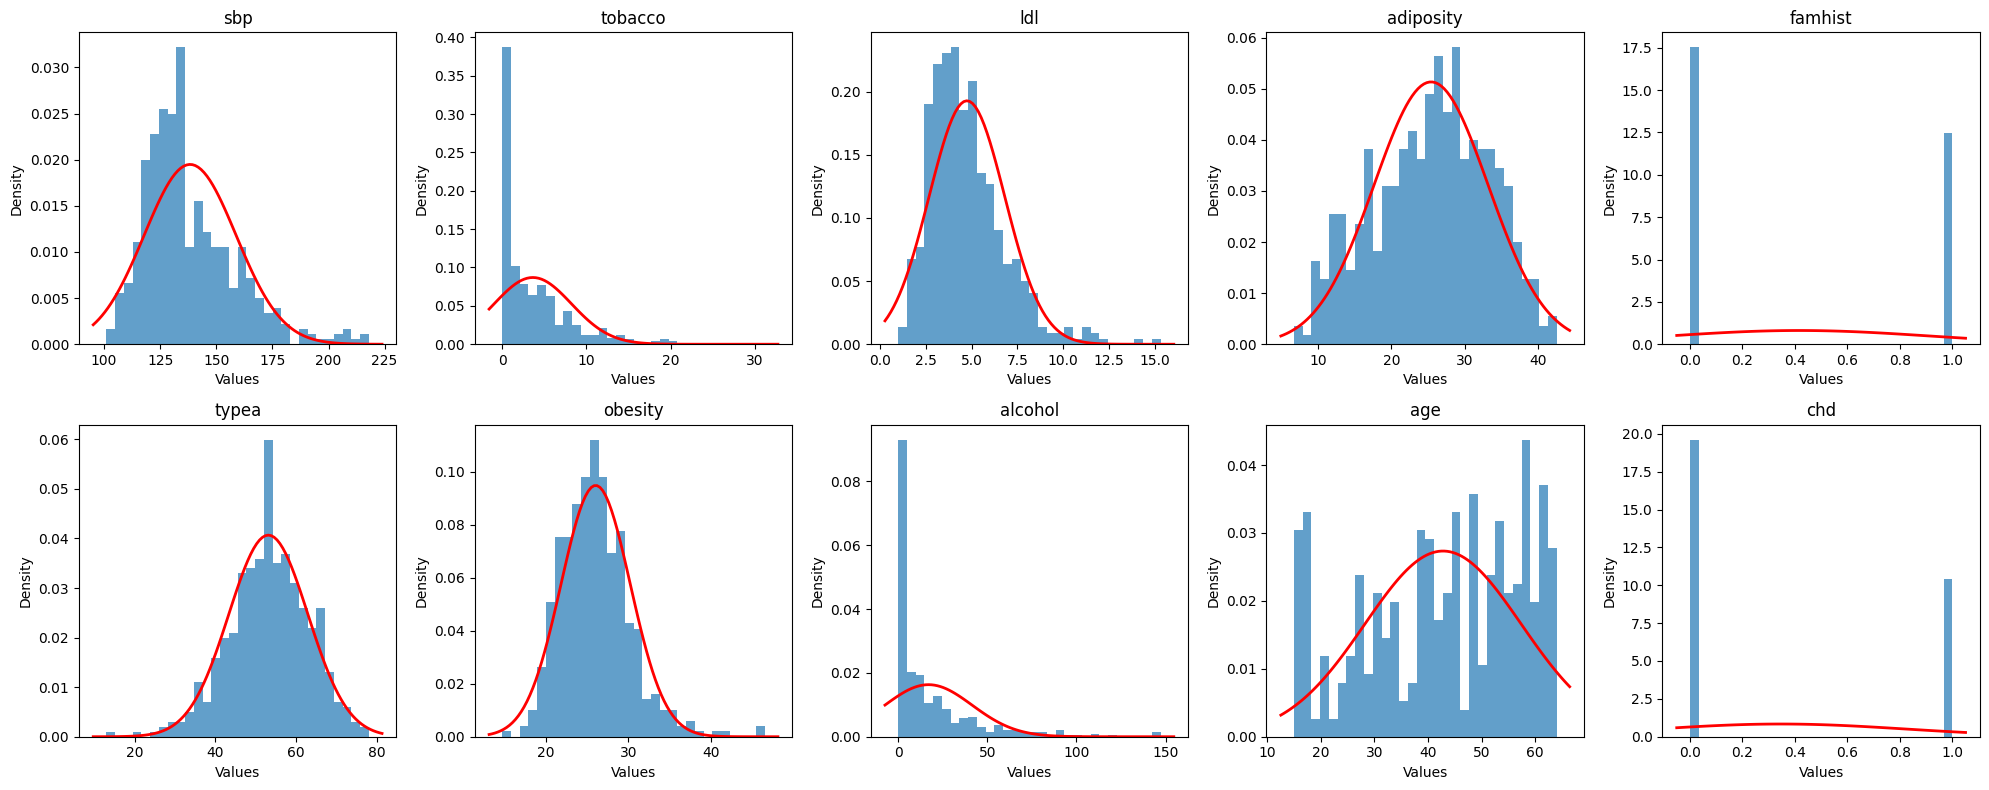

In [9]:
# Create a figure with a grid of 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with distribution curves
for i, column in enumerate(df.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(df[column], bins=30, density=True, alpha=0.7,)
    ax.set_title(f'{column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')

    # Add distribution curve
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, sigma = np.mean(df[column]), np.std(df[column])
    p = np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))
    ax.plot(x, p, 'k',color='red', linewidth=2)



# Hide any extra subplots
for ax in axes[len(df.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
print(df.describe().to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & sbp & tobacco & ldl & adiposity & famhist & typea & obesity & alcohol & age & chd \\
\midrule
count & 462.0 & 462.0 & 462.0 & 462.0 & 462.0 & 462.0 & 462.0 & 462.0 & 462.0 & 462.0 \\
mean & 138.3 & 3.6 & 4.7 & 25.4 & 0.4 & 53.1 & 26.0 & 17.0 & 42.8 & 0.3 \\
std & 20.5 & 4.6 & 2.1 & 7.8 & 0.5 & 9.8 & 4.2 & 24.5 & 14.6 & 0.5 \\
min & 101.0 & 0.0 & 1.0 & 6.7 & 0.0 & 13.0 & 14.7 & 0.0 & 15.0 & 0.0 \\
25% & 124.0 & 0.1 & 3.3 & 19.8 & 0.0 & 47.0 & 23.0 & 0.5 & 31.0 & 0.0 \\
50% & 134.0 & 2.0 & 4.3 & 26.1 & 0.0 & 53.0 & 25.8 & 7.5 & 45.0 & 0.0 \\
75% & 148.0 & 5.5 & 5.8 & 31.2 & 1.0 & 60.0 & 28.5 & 23.9 & 55.0 & 1.0 \\
max & 218.0 & 31.2 & 15.3 & 42.5 & 1.0 & 78.0 & 46.6 & 147.2 & 64.0 & 1.0 \\
\bottomrule
\end{tabular}



In [15]:
X = df.drop(columns=['chd'])

# Standardize the data
X_standardized = (X - X.mean()) / X.std()

# Compute the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the top k eigenvectors (e.g., k=2 for 2D visualization)
k = 2
projection_matrix = sorted_eigenvectors[:, :k]

# Transform the original standardized data
X_pca = X_standardized.dot(projection_matrix)

# The result is in X_pca, which you can use for further analysis or visualization

In [16]:
cov_matrix

array([[ 1.        ,  0.21224652,  0.15829633,  0.35650008,  0.08564531,
        -0.05745431,  0.23806661,  0.14009559,  0.3887706 ],
       [ 0.21224652,  1.        ,  0.15890546,  0.28664037,  0.08860143,
        -0.01460788,  0.12452941,  0.20081339,  0.45033016],
       [ 0.15829633,  0.15890546,  1.        ,  0.44043175,  0.16135306,
         0.04404758,  0.33050586, -0.0334034 ,  0.31179923],
       [ 0.35650008,  0.28664037,  0.44043175,  1.        ,  0.18172101,
        -0.04314364,  0.71655625,  0.10033013,  0.62595442],
       [ 0.08564531,  0.08860143,  0.16135306,  0.18172101,  1.        ,
         0.04480858,  0.11559508,  0.08051969,  0.23966742],
       [-0.05745431, -0.01460788,  0.04404758, -0.04314364,  0.04480858,
         1.        ,  0.0740061 ,  0.03949794, -0.10260632],
       [ 0.23806661,  0.12452941,  0.33050586,  0.71655625,  0.11559508,
         0.0740061 ,  1.        ,  0.05161957,  0.29177713],
       [ 0.14009559,  0.20081339, -0.0334034 ,  0.10033013,  0

In [19]:
projection_matrix

array([[-0.32375128,  0.23829995],
       [-0.30183439,  0.45850912],
       [-0.33392218, -0.3639135 ],
       [-0.51629643, -0.18761714],
       [-0.19514307,  0.0013409 ],
       [ 0.0183216 , -0.28218155],
       [-0.40147338, -0.39190548],
       [-0.12142135,  0.54301526],
       [-0.46008104,  0.19304296]])

In [18]:
eigenvectors

array([[-0.32375128,  0.01414223, -0.23537117,  0.23829995,  0.12509476,
         0.19635634, -0.26807014, -0.78137544, -0.21490685],
       [-0.30183439,  0.04778703, -0.48893063,  0.45850912, -0.06815164,
        -0.00535626,  0.19286233,  0.16310722,  0.62358275],
       [-0.33392218, -0.07187703, -0.07033449, -0.3639135 , -0.00310419,
        -0.14029199, -0.78818478,  0.21529068,  0.24222488],
       [-0.51629643,  0.75747666,  0.17313424, -0.18761714,  0.08187389,
         0.13503614,  0.19568167,  0.13086682, -0.11889455],
       [-0.19514307,  0.02880669, -0.18657032,  0.0013409 , -0.33843911,
        -0.833435  ,  0.12848703, -0.08572183, -0.30539646],
       [ 0.0183216 ,  0.04060179,  0.16553958, -0.28218155, -0.79229308,
         0.20984601,  0.0778147 , -0.33186765,  0.32098457],
       [-0.40147338, -0.50400323, -0.33869464, -0.39190548, -0.04019021,
         0.3054632 ,  0.33334579,  0.17363053, -0.28338297],
       [-0.12142135, -0.03309417,  0.12505724,  0.54301526, -0